In [ ]:
%%bash

# pip install kagglehub

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [ ]:
# 캐글에서 데이터셋 다운
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [01:44<00:00, 23.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
%%bash
# 다운 받은 파일 확인
ls -l /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2
ls -l /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray
ls -l /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray
# sample_data 하위 폴더로 경로의 폴더 복사(cp -r 해서 폴더 내용 채로 해당 폴더 전부 복사)
cp -r /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray sample_data/

total 4
drwxr-xr-x 7 root root 4096 Dec 12 04:58 chest_xray
total 20
drwxr-xr-x 5 root root 4096 Dec 12 04:58 chest_xray
drwxr-xr-x 3 root root 4096 Dec 12 04:58 __MACOSX
drwxr-xr-x 4 root root 4096 Dec 12 04:58 test
drwxr-xr-x 4 root root 4096 Dec 12 04:58 train
drwxr-xr-x 4 root root 4096 Dec 12 04:58 val
total 12
drwxr-xr-x 4 root root 4096 Dec 12 04:58 test
drwxr-xr-x 4 root root 4096 Dec 12 04:58 train
drwxr-xr-x 4 root root 4096 Dec 12 04:58 val


In [ ]:
%%bash
ls -l sample_data/
ls -l sample_data/chest_xray

# ls -l /   # 리눅스에서 최상위 경로 ( 윈도우에서는 C:\와 유사한 위치 )
ls -l .     # . : 현재 경로 (여기서는 content)
ls -l       #   : 현재 경로 (여기서는 content)

total 55508
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Dec 10 17:46 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Dec 10 17:46 california_housing_train.csv
drwxr-xr-x 5 root root     4096 Dec 12 04:58 chest_xray
-rw-r--r-- 1 root root 18289443 Dec 10 17:46 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Dec 10 17:46 mnist_train_small.csv
-rwxr-xr-x 1 root root      962 Jan  1  2000 README.md
total 12
drwxr-xr-x 4 root root 4096 Dec 12 04:58 test
drwxr-xr-x 4 root root 4096 Dec 12 04:58 train
drwxr-xr-x 4 root root 4096 Dec 12 04:58 val
total 8
drwx------ 6 root root 4096 Dec 12 04:56 drive
drwxr-xr-x 1 root root 4096 Dec 12 04:58 sample_data
total 8
drwx------ 6 root root 4096 Dec 12 04:56 drive
drwxr-xr-x 1 root root 4096 Dec 12 04:58 sample_data


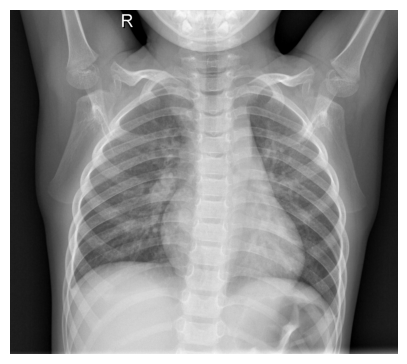

In [ ]:
import cv2

plt.figure(figsize=(5, 5))
img = cv2.imread('./sample_data/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

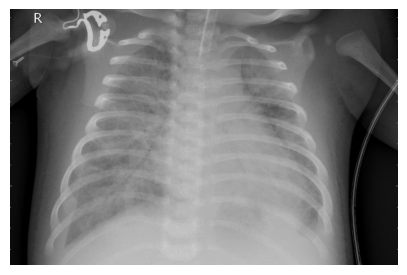

In [ ]:
plt.figure(figsize=(5, 5))
img = cv2.imread('./sample_data/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# 입력 자동화 도구 만들기
train_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)
validation_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)
test_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)

In [ ]:
# 입력 데이터 구성
datasets = []
for path, generator in zip(['train', 'val', 'test'],
                           [train_generator, validation_generator, test_generator]):
    dataset = generator.flow_from_directory(directory = f'sample_data/chest_xray/{path}',
                                            target_size=(256, 256),
                                            batch_size=32,
                                            class_mode='binary')
    datasets.append(dataset)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
(32, 256, 256, 3) (32,)
1.0
[0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


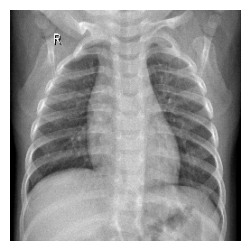

In [ ]:
# 데이터 확인
print(type(datasets[0]))
for x_batch, y_batch in datasets[0]:
    print(x_batch.shape, y_batch.shape)
    print(x_batch[0].max())
    print(y_batch)
    break

plt.figure(figsize=(3, 3))
plt.imshow(x_batch[0])
plt.axis('off')
plt.show()

# 모델 만들기

In [ ]:
# 사전 학습 모델 불러오기
base_model = tf_keras.applications.vgg16.VGG16(include_top = False,
                                               weights = 'imagenet',
                                               input_shape = (256, 256, 3))

base_model.trainable = False
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# 모델 구조 설계 (사전학습 모델과 판별 모델 결합)
input = tf_keras.layers.Input(shape=(256, 256, 3))
x = base_model(input)
x = tf_keras.layers.Flatten()(x)
x = tf_keras.layers.Dense(512, activation='relu')(x)
x = tf_keras.layers.Dropout(0.5)(x)
x = tf_keras.layers.Dense(128, activation='relu')(x)
x = tf_keras.layers.Dropout(0.5)(x)
x = tf_keras.layers.Dense(32, activation='relu')(x)
x = tf_keras.layers.Dropout(0.5)(x)
output = tf_keras.layers.Dense(1, activation='sigmoid')(x)

full_model = tf_keras.Model(input, output)
full_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,562,241 (120.40 MB)

 Trainable params: 16,847,553 (64.27 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# 모델 학습 설계
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

# sparse_categorical_crossentropy : target: 6
# categorical_crossentropy : target: [0, 0, 0, 0, 0, 0, 1]
full_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])  # accuracy: 범용, binary_accuracy: 이진분류용

In [ ]:
# 모델 학습
# train[0], val[1], test[2]
fit_history = full_model.fit(datasets[0],
                             epochs=20,
                             validation_data=datasets[1],
                             callbacks = [early_stopping])

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 354ms/step - binary_accuracy: 0.9769 - loss: 0.0750 - val_binary_accuracy: 0.8750 - val_loss: 0.4779
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 342ms/step - binary_accuracy: 0.9764 - loss: 0.0576 - val_binary_accuracy: 0.8750 - val_loss: 0.3475
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 347ms/step - binary_accuracy: 0.9764 - loss: 0.0457 - val_binary_accuracy: 0.8750 - val_loss: 0.4111
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 343ms/step - binary_accuracy: 0.9858 - loss: 0.0364 - val_binary_accuracy: 0.8750 - val_loss: 0.3894
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 345ms/step - binary_accuracy: 0.9794 - loss: 0.0544 - val_binary_accuracy: 0.9375 - val_loss: 0.0650
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 352ms/step - binary_accuracy: 0.9704 - loss: 0.0683 - val_binary_accuracy: 0.9375 - val_loss: 0.0914
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 362ms/step - binary_accuracy: 0.9770 - loss: 0.0542 - val_binary_accuracy: 0.9375 - va

In [ ]:
# train[0], val[1], test[2]
print(full_model.evaluate(datasets[0]), full_model.evaluate(datasets[2]))
# epoch:10, train: 0.9980828166007996, test: 0.7932692170143127
# epoch:20, train: 0.9986580014228821, test: 0.7532051205635071

163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 343ms/step - binary_accuracy: 0.9997 - loss: 0.0036
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - binary_accuracy: 0.7787 - loss: 2.9847
[0.004176214337348938, 0.9986580014228821] [3.7273778915405273, 0.7532051205635071]


In [ ]:
fit_history.history.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

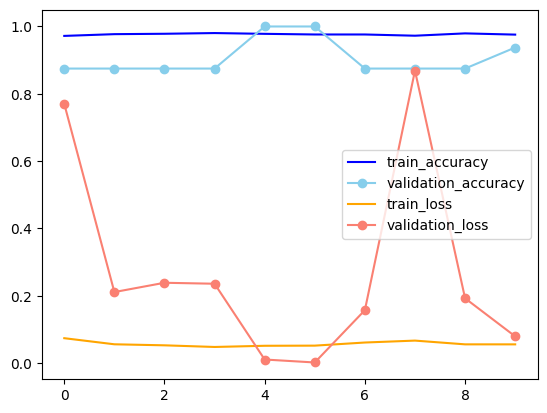

In [ ]:
# epoch=10
plt.plot(fit_history.epoch, fit_history.history['binary_accuracy'], label = 'train_accuracy', color='blue')
plt.plot(fit_history.epoch, fit_history.history['val_binary_accuracy'], label = 'validation_accuracy', color='skyblue', marker='o')
plt.plot(fit_history.epoch, fit_history.history['loss'], label = 'train_loss', color='orange')
plt.plot(fit_history.epoch, fit_history.history['val_loss'], label = 'validation_loss', color='salmon', marker='o')
plt.legend()
plt.show()

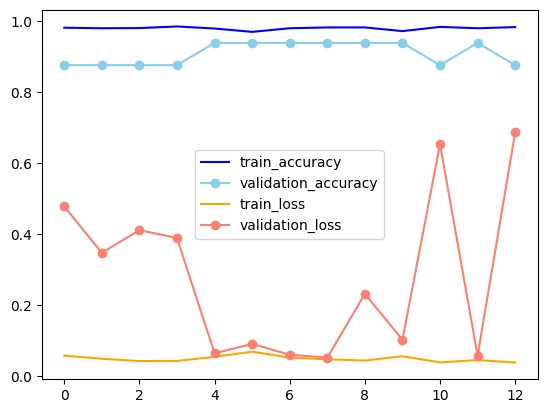

In [ ]:
# epoch=20
plt.plot(fit_history.epoch, fit_history.history['binary_accuracy'], label = 'train_accuracy', color='blue')
plt.plot(fit_history.epoch, fit_history.history['val_binary_accuracy'], label = 'validation_accuracy', color='skyblue', marker='o')
plt.plot(fit_history.epoch, fit_history.history['loss'], label = 'train_loss', color='orange')
plt.plot(fit_history.epoch, fit_history.history['val_loss'], label = 'validation_loss', color='salmon', marker='o')
plt.legend()
plt.show()

# 선생님과 함께

In [ ]:
# 입력 데이터 구성
datasets = []
for path, generator in zip(['train', 'val', 'test'],
                           [train_generator, validation_generator, test_generator]):
    dataset = generator.flow_from_directory(directory = f'sample_data/chest_xray/{path}',
                                            target_size=(256, 256),
                                            batch_size=32,
                                            class_mode='categorical')
    datasets.append(dataset)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
print( type(datasets[0]) )
for x_batch, y_batch in datasets[0]:
  print(x_batch.shape, y_batch.shape)
  print(x_batch[0].max())
  print(y_batch)    # class_mode를 categorical로 지정했기 때문에 dense matrix 형식으로 반환
  break

<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
(32, 256, 256, 3) (32, 2)
1.0
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
# 사전 학습 모델 불러오기
base_model = tf_keras.applications.vgg16.VGG16(include_top = False,
                                               weights = 'imagenet',
                                               input_shape = (256, 256, 3))

base_model.trainable = False
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# 모델 구조 설계 (사전학습 모델과 판별 모델 결합)
input = tf_keras.layers.Input(shape=(256, 256, 3))
x = base_model(input)
x = tf_keras.layers.Flatten()(x)
x = tf_keras.layers.Dense(256, activation='relu')(x)
output = tf_keras.layers.Dense(2, activation='softmax')(x)

full_model2 = tf_keras.Model(input, output)
full_model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,104,066 (88.14 MB)

 Trainable params: 8,389,378 (32.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# 모델 학습 설계
full_model2.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])  # accuracy: 범용, binary_accuracy: 이진분류용

In [ ]:
# 모델 학습
# train[0], val[1], test[2]
fit_history2 = full_model2.fit(datasets[0],
                               epochs=20,
                               validation_data=datasets[1],
                               callbacks = [early_stopping])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 360ms/step - accuracy: 0.8878 - loss: 0.7928 - val_accuracy: 0.8750 - val_loss: 0.1733
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 328ms/step - accuracy: 0.9835 - loss: 0.0433 - val_accuracy: 1.0000 - val_loss: 0.0147
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 332ms/step - accuracy: 0.9936 - loss: 0.0174 - val_accuracy: 0.8750 - val_loss: 0.2240
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 334ms/step - accuracy: 0.9976 - loss: 0.0097 - val_accuracy: 0.8750 - val_loss: 0.1683
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 344ms/step - accuracy: 0.9966 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 340ms/step - accuracy: 0.9947 - loss: 0.0159 - val_accuracy: 0.9375 - val_loss: 0.2581
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 339ms/step - accuracy: 0.9846 - loss: 0.0394 - val_accuracy: 0.8750 - val_loss: 0.3948
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 361ms/step - accuracy: 0.9946 - loss: 0.0148 - val

In [ ]:
print(full_model2.evaluate(datasets[0]), full_model2.evaluate(datasets[2]))
# epoch:20, train: 에러, test: 0.7644230723381042

163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 350ms/step - accuracy: 1.0000 - loss: 2.9004e-04


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step - accuracy: 0.7973 - loss: 1.6298
[0.0003881430602632463, 1.0] [1.8949514627456665, 0.7644230723381042]


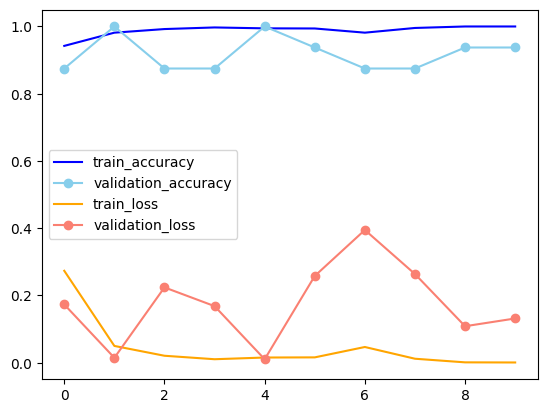

In [ ]:
# epoch=20
plt.plot(fit_history2.epoch, fit_history2.history['accuracy'], label = 'train_accuracy', color='blue')
plt.plot(fit_history2.epoch, fit_history2.history['val_accuracy'], label = 'validation_accuracy', color='skyblue', marker='o')
plt.plot(fit_history2.epoch, fit_history2.history['loss'], label = 'train_loss', color='orange')
plt.plot(fit_history2.epoch, fit_history2.history['val_loss'], label = 'validation_loss', color='salmon', marker='o')
plt.legend()
plt.show()